In [1]:
import geopandas as gpd
import pandas as pd

# Load the hotel data
hotels_df = pd.read_excel('Classified Hotels( 1-5 Star).xlsx')
hotels_df['Grade'] = hotels_df['Grade'].map({'ONE': 1, 'TWO': 2, 'THREE': 3, 'FOUR': 4, 'FIVE': 5})

# Load the shapefile
shapefile_gdf = gpd.read_file('Shape File\lka_admbnda_adm1_slsd_20220816.shp')


In [2]:
# Convert the hotels DataFrame to a GeoDataFrame
hotels_gdf = gpd.GeoDataFrame(
    hotels_df,
    geometry=gpd.points_from_xy(hotels_df.Logitiute, hotels_df.Latitude)
)

# Set the CRS for the hotels GeoDataFrame to match the shapefile
hotels_gdf.crs = shapefile_gdf.crs


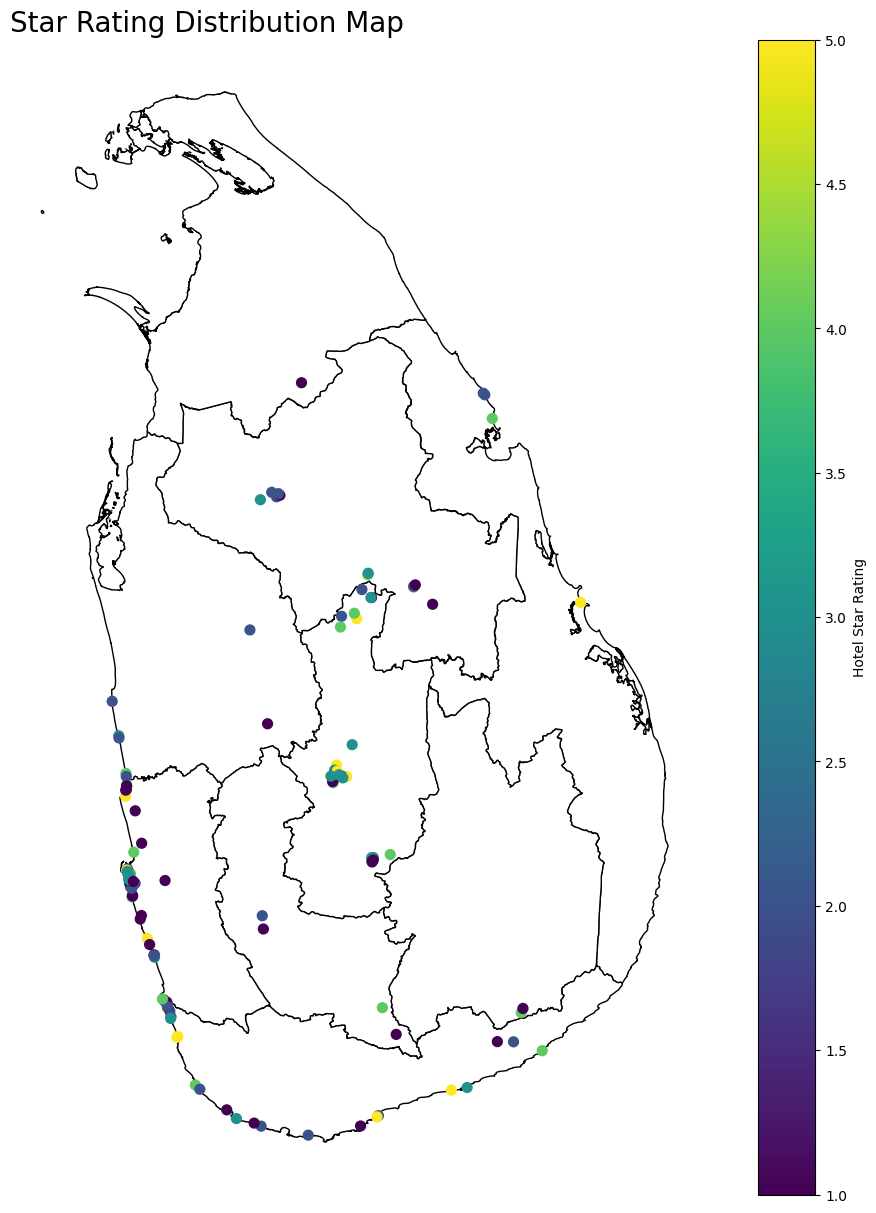

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the shapefile as the base layer
shapefile_gdf.plot(ax=ax, color='white', edgecolor='black')

# Overlay the hotel data
hotels_gdf.plot(column='Grade', ax=ax, legend=True,
                cmap='viridis', markersize=50, legend_kwds={'label': "Hotel Star Rating"})

# Enhance the map with title and without axis
ax.set_title('Star Rating Distribution Map', fontdict={'fontsize': 20}, loc='left')
ax.set_axis_off()

# Show the map
plt.show()
